In [1]:
import sys
sys.path.append('./paralel_planarity_criterion')

In [2]:
def print_cycle_edge_table(boolean_list, edge_map, cycle_map):
    # Get the number of edges (columns) and cycles (rows)
    num_edges = len(set(edge_map.values()))
    num_cycles = len(cycle_map)

    # Invert cycle_map to get row index to cycle mapping
    cycle_indices = {v: k for k, v in cycle_map.items()}
    edge_indices = {v: k for k, v in edge_map.items() if v in set(edge_map.values())}

    # Prepare column widths based on edge tuple lengths
    col_widths = []
    for col in range(num_edges):
        edge_label = str(edge_indices[col])
        col_widths.append(len(edge_label) + 2)  # +2 for padding

    # Determine max width for the first column based on the longest cycle label
    max_cycle_len = max(len(str(cycle_indices[row])) for row in range(num_cycles))
    first_col_width = max(max_cycle_len, len("Cycle/Edge")) + 2  # Add padding

    # Print header
    header = "Cycle/Edge".ljust(first_col_width)
    for col in range(num_edges):
        edge_label = str(edge_indices[col])
        header += edge_label.ljust(col_widths[col])
    print(header)
    print('-' * len(header))

    # Print each row
    for row in range(num_cycles):
        cycle = str(cycle_indices[row])
        row_values = boolean_list[row * num_edges: (row + 1) * num_edges]
        row_str = cycle.ljust(first_col_width)
        for col, val in enumerate(row_values):
            row_str += ('True' if val else 'False').ljust(col_widths[col])
        print(row_str)



Testing Planar Graphs:
nodos grafo: [0, 1, 2, 3, 4, 5, 6]
edges grafo: [(0, 6), (0, 1), (0, 4), (1, 3), (1, 2), (1, 6), (2, 5), (3, 4), (3, 5), (4, 5)]
Graph Triconnected Components:


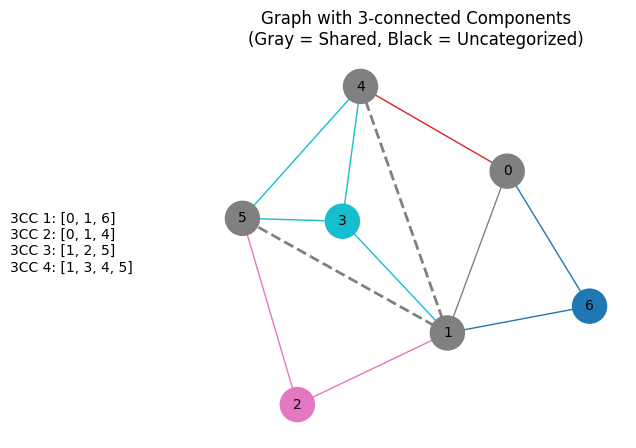

Cycle/Edge       (3, 1)  (4, 1)  (5, 1)  (4, 3)  (5, 3)  (5, 4)  
-----------------------------------------------------------------
(1, 3, 4, 1)     True    True    False   True    False   False   
(3, 1, 5, 3)     True    False   True    False   True    False   
(4, 3, 1, 5, 4)  True    True    True    True    False   True    
Graph 1: NetworkX: True, Your method: True, Match: True


nodos grafo: [0, 1, 2, 3, 4, 5]
edges grafo: [(0, 2), (0, 3), (0, 5), (0, 4), (1, 2), (1, 5), (2, 3), (2, 5)]
Graph Triconnected Components:


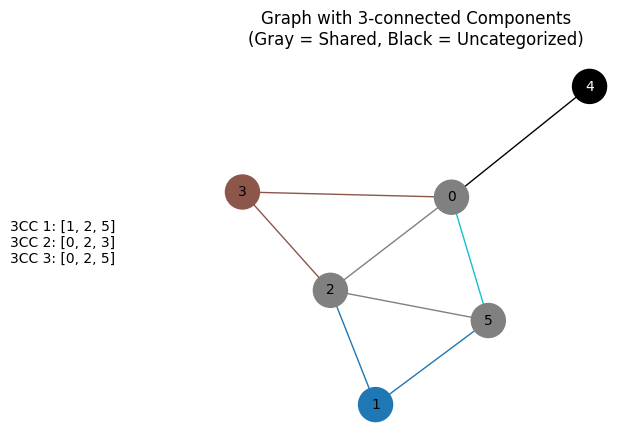

Cycle/Edge    (2, 0)  (5, 0)  (5, 2)  
--------------------------------------
(2, 0, 5, 2)  True    True    True    
Graph 2: NetworkX: True, Your method: True, Match: True


nodos grafo: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges grafo: [(0, 9), (1, 6), (1, 5), (1, 7), (1, 9), (2, 8), (2, 5), (2, 4), (2, 6), (3, 9), (3, 5), (4, 8), (5, 9), (6, 7), (7, 8), (8, 9)]
Graph Triconnected Components:


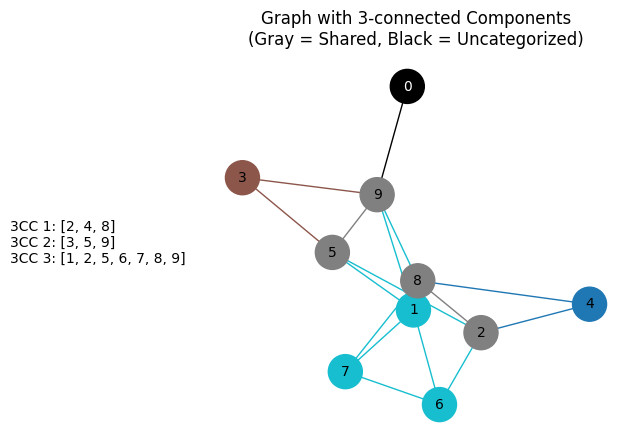

false por plane mesh mala
Cycle/Edge             (6, 1)  (5, 1)  (7, 1)  (9, 1)  (8, 2)  (5, 2)  (6, 2)  (9, 5)  (7, 6)  (8, 7)  (9, 8)  
---------------------------------------------------------------------------------------------------------------
(1, 6, 2, 8, 7, 1)     True    False   True    False   True    False   True    False   True    True    False   
(1, 6, 2, 8, 9, 1)     True    True    False   True    True    True    True    True    False   False   True    
(2, 6, 1, 5, 2)        True    True    False   False   False   True    True    False   False   False   False   
(5, 1, 6, 2, 8, 9, 5)  True    True    False   False   True    True    True    True    False   False   True    
(6, 2, 8, 7, 6)        False   False   False   False   True    False   True    False   True    True    False   


failing tcc: [1, 2, 5, 6, 7, 8, 9] [(1, 6), (1, 5), (1, 7), (1, 9), (2, 8), (2, 5), (2, 6), (5, 9), (6, 7), (7, 8), (8, 9)] 


Graph 3: NetworkX: True, Your method: False, Match: False


n

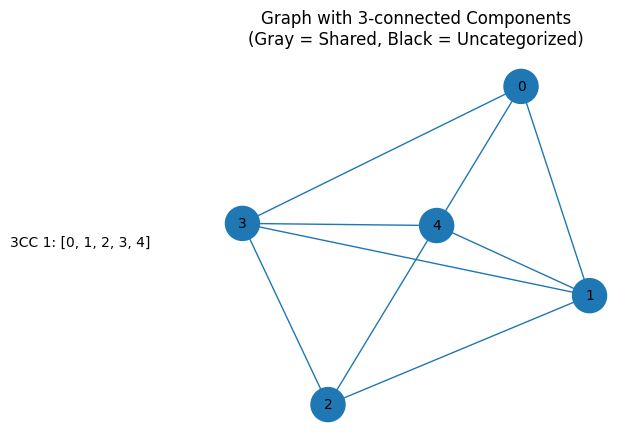

false por plane mesh mala
Cycle/Edge          (1, 0)  (3, 0)  (4, 0)  (4, 1)  (3, 1)  (2, 1)  (4, 2)  (3, 2)  (4, 3)  
--------------------------------------------------------------------------------------------
(0, 3, 2, 4, 0)     False   True    True    False   False   False   True    True    True    
(1, 0, 3, 2, 4, 1)  True    True    True    True    False   False   True    True    True    
(1, 0, 3, 1)        True    True    False   False   True    False   False   False   False   
(1, 0, 3, 2, 1)     True    True    False   False   True    True    False   True    False   
(3, 2, 4, 3)        False   False   False   False   False   False   True    True    True    


failing tcc: [0, 1, 2, 3, 4] [(0, 1), (0, 3), (0, 4), (1, 4), (1, 3), (1, 2), (2, 4), (2, 3), (3, 4)] 


Graph 4: NetworkX: True, Your method: False, Match: False


nodos grafo: [0, 1, 2, 3, 4, 5, 6, 7]
edges grafo: [(0, 5), (0, 4), (0, 3), (0, 6), (1, 5), (1, 6), (2, 7), (2, 3), (4, 5)]
Graph Triconnected Components:


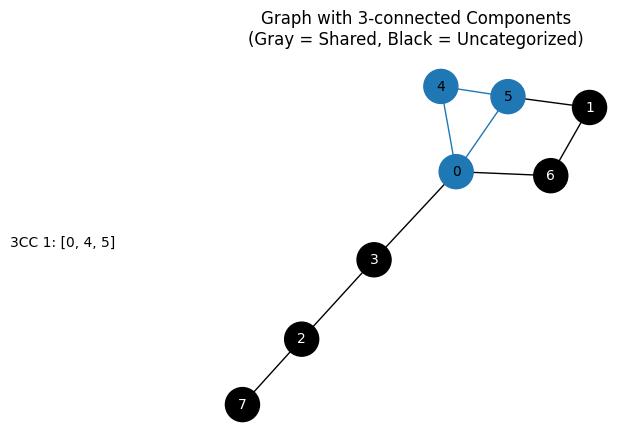

Cycle/Edge    (5, 0)  (4, 0)  (5, 4)  
--------------------------------------
(0, 5, 4, 0)  True    True    True    
Graph 5: NetworkX: True, Your method: True, Match: True




'\n# Test on non-planar graphs\nprint("\nTesting Non-Planar Graphs:")\nfor i, G in enumerate(nonplanar_graphs):\n    print("nodos grafo:", G.nodes())\n    print("edges grafo:", G.edges())\n    try:\n        my_result, info = solver.is_planar(G)\n    except Exception as e:\n        my_result = f"Error: {e}"\n    nx_result, _ = nx.check_planarity(G)\n    print(f"Graph {i+1}: NetworkX: {nx_result}, Your method: {my_result}, Match: {my_result == nx_result}")\n'

In [3]:
import networkx as nx
import random


import triconnected_components as tcc ### TODO CAMBIAR AL CAMBIAR NOMBRE 
import printers 
finder = tcc.TriconnectedFinder()
printer = printers.ConnectedComponentsDrawer()

# Import your solver class
from planarity_criterion import PlanarityCriterion  # Replace with your actual module name if different

# Initialize solver
solver = PlanarityCriterion()

def generate_graphs(num_planar, num_nonplanar, seed=42):
    """
    Generate a list of planar and non-planar graphs using NetworkX's check_planarity.
    """
    random.seed(seed)
    planar_graphs = []
    nonplanar_graphs = []
    trials = 0

    while len(planar_graphs) < num_planar or len(nonplanar_graphs) < num_nonplanar:
        n = random.randint(5, 10)   # number of nodes
        m = random.randint(n, n * (n - 1) // 2)  # number of edges
        G = nx.gnm_random_graph(n, m, seed=seed + trials)
        
        is_planar, _ = nx.check_planarity(G)
        
        if is_planar and len(planar_graphs) < num_planar:
            planar_graphs.append(G)
        elif not is_planar and len(nonplanar_graphs) < num_nonplanar:
            nonplanar_graphs.append(G)
        
        trials += 1  # change seed for the next trial

    return planar_graphs, nonplanar_graphs

# Generate 5 planar and 5 non-planar graphs
planar_graphs, nonplanar_graphs = generate_graphs(5, 5)

# Test on planar graphs
print("Testing Planar Graphs:")
for i, G in enumerate(planar_graphs):
    print("nodos grafo:", G.nodes())
    print("edges grafo:", G.edges())
    
    tcc, _ = finder.triconnected_comps(G)
    print("Graph Triconnected Components:")
    printer.print_n_connected_components(G, tcc, N=3)
    try:
        my_result, info = solver.is_planar(G)
        print_cycle_edge_table(info["truth_assign"], info["edge_index_map"], info["cycle_index_map"])
        if not my_result: print("\n\nfailing tcc:", info["failing tcc"].nodes(), info["failing tcc"].edges(), "\n\n")
        #print("info:", info)
    except Exception as e:
        my_result = f"Error: {e}"
    nx_result, _ = nx.check_planarity(G)
    print(f"Graph {i+1}: NetworkX: {nx_result}, Your method: {my_result}, Match: {my_result == nx_result}")
    print()
    print()
"""
# Test on non-planar graphs
print("\nTesting Non-Planar Graphs:")
for i, G in enumerate(nonplanar_graphs):
    print("nodos grafo:", G.nodes())
    print("edges grafo:", G.edges())
    try:
        my_result, info = solver.is_planar(G)
    except Exception as e:
        my_result = f"Error: {e}"
    nx_result, _ = nx.check_planarity(G)
    print(f"Graph {i+1}: NetworkX: {nx_result}, Your method: {my_result}, Match: {my_result == nx_result}")
"""

In [4]:
# TODO REVISAR LT 
# TODO REVISAR CONFLICTOS PUENTES